In [1]:
#you are given dataset which contains information about houses prices in the suburbs of chicago
#your task is first analysis the data ,and then to apply a regression model to it.

In [ ]:
DATA OVERVIEW:
dataset consists of following variables:

Price : price of house
Bedroom: number of bedrooms
Room: number of rooms
Space : size of house (in square feet)
Lot : width of a lot
Tax : amount of annual tax
Bathroom : number of bathrooms
Garage : number of garage
Condition: condition of house (1 if good , 0 otherwise)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns

In [310]:
df=pd.read_csv("realest.csv")
df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [92]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [15]:
df.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [20]:
df[df.duplicated()]

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition


In [73]:
df[df.isnull().any(axis=1)]

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
6,49.0,5.0,1400.0,8.0,NaN,678.0,1.0,1.0,1.0
8,72.0,4.0,1290.0,8.0,NaN,800.0,1.5,1.5,0.0
17,64.0,4.0,1226.0,8.0,37.0,NaN,2.0,2.0,0.0
21,43.0,3.0,596.0,5.0,50.0,NaN,1.0,0.0,0.0
32,49.0,4.0,1408.0,8.0,NaN,650.0,1.0,1.0,1.0
49,45.0,2.0,NaN,4.0,30.0,470.0,2.0,1.0,0.0
52,50.0,2.0,NaN,5.0,39.0,687.0,1.5,0.0,0.0
56,65.0,2.0,1145.0,7.0,50.0,NaN,1.5,1.5,0.0
68,65.0,2.0,NaN,7.0,30.0,719.0,2.0,0.0,1.0
73,44.0,3.0,579.0,5.0,NaN,753.0,1.0,0.0,0.0


In [74]:
df[df.isnull().any(axis=1)].shape

(29, 9)

In [75]:
df[df.isnull().any(axis=1)].sum()

Price         1550.0
Bedroom         85.0
Space        18197.0
Room           178.0
Lot            609.0
Tax          15560.0
Bathroom        40.5
Garage          28.0
Condition        7.0
dtype: float64

In [76]:
m1=df[['Price','Space','Lot','Tax']].mean()
m1

Price      56.474359
Space    1097.246575
Lot        32.808219
Tax       911.707483
dtype: float64

In [77]:
df1=df[['Price','Space','Lot','Tax']].fillna(m1)

In [78]:
df1

,Price,Space,Lot,Tax
0,53.000000,967.000000,39.000000,652.000000
1,55.000000,815.000000,33.000000,1000.000000
2,56.000000,900.000000,35.000000,897.000000
3,58.000000,1007.000000,24.000000,964.000000
4,64.000000,1100.000000,50.000000,1099.000000
...,...,...,...,...
152,44.000000,820.000000,27.000000,911.707483
153,43.000000,593.000000,30.000000,465.000000
154,53.000000,716.000000,30.000000,585.000000
155,62.000000,951.000000,30.000000,895.000000


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   157 non-null    float64
 1   Space   157 non-null    float64
 2   Lot     157 non-null    float64
 3   Tax     157 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


In [82]:
df2=df[['Bedroom','Room','Bathroom','Garage','Condition']]
df2

,Bedroom,Room,Bathroom,Garage,Condition
0,2.0,5.0,1.5,0.0,0.0
1,2.0,5.0,1.0,2.0,1.0
2,3.0,5.0,1.5,1.0,0.0
3,3.0,6.0,1.5,2.0,0.0
4,3.0,7.0,1.5,1.5,0.0
...,...,...,...,...,...
152,3.0,5.0,1.0,0.0,1.0
153,2.0,4.0,2.0,1.0,0.0
154,3.0,6.0,1.0,2.0,1.0
155,4.0,7.0,2.0,1.0,0.0


In [83]:
df2.isnull().sum()

Bedroom      1
Room         1
Bathroom     1
Garage       1
Condition    1
dtype: int64

In [85]:
df2=df2.fillna(df2.mode().iloc[0])
df2

,Bedroom,Room,Bathroom,Garage,Condition
0,2.0,5.0,1.5,0.0,0.0
1,2.0,5.0,1.0,2.0,1.0
2,3.0,5.0,1.5,1.0,0.0
3,3.0,6.0,1.5,2.0,0.0
4,3.0,7.0,1.5,1.5,0.0
...,...,...,...,...,...
152,3.0,5.0,1.0,0.0,1.0
153,2.0,4.0,2.0,1.0,0.0
154,3.0,6.0,1.0,2.0,1.0
155,4.0,7.0,2.0,1.0,0.0


In [86]:
df2.mode()

,Bedroom,Room,Bathroom,Garage,Condition
0,3.0,5.0,1.0,0.0,0.0


In [156]:
df3=pd.concat([df1,df2],axis=1)

In [249]:
df3

,Price,Space,Lot,Tax,Bedroom,Room,Bathroom,Garage,Condition
0,53.000000,967.000000,39.000000,652.000000,2.0,5.0,1.5,0.0,0.0
1,55.000000,815.000000,33.000000,1000.000000,2.0,5.0,1.0,2.0,1.0
2,56.000000,900.000000,35.000000,897.000000,3.0,5.0,1.5,1.0,0.0
3,58.000000,1007.000000,24.000000,964.000000,3.0,6.0,1.5,2.0,0.0
4,64.000000,1100.000000,50.000000,1099.000000,3.0,7.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.000000,820.000000,27.000000,911.707483,3.0,5.0,1.0,0.0,1.0
153,43.000000,593.000000,30.000000,465.000000,2.0,4.0,2.0,1.0,0.0
154,53.000000,716.000000,30.000000,585.000000,3.0,6.0,1.0,2.0,1.0
155,62.000000,951.000000,30.000000,895.000000,4.0,7.0,2.0,1.0,0.0


In [94]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      157 non-null    float64
 1   Space      157 non-null    float64
 2   Lot        157 non-null    float64
 3   Tax        157 non-null    float64
 4   Bedroom    157 non-null    float64
 5   Room       157 non-null    float64
 6   Bathroom   157 non-null    float64
 7   Garage     157 non-null    float64
 8   Condition  157 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [95]:
df3.corr()

,Price,Space,Lot,Tax,Bedroom,Room,Bathroom,Garage,Condition
Price,1.000000,0.709174,0.435381,0.493987,0.302436,0.576999,0.537067,0.551173,0.079261
Space,0.709174,1.000000,0.389862,0.542282,0.569494,0.742912,0.566034,0.380897,0.080421
Lot,0.435381,0.389862,1.000000,0.166208,0.314842,0.456040,0.386903,0.161270,-0.055667
Tax,0.493987,0.542282,0.166208,1.000000,0.027495,0.117252,-0.019543,0.374648,-0.144055
Bedroom,0.302436,0.569494,0.314842,0.027495,1.000000,0.824184,0.546180,0.177793,-0.090059
Room,0.576999,0.742912,0.456040,0.117252,0.824184,1.000000,0.689054,0.304264,0.057598
Bathroom,0.537067,0.566034,0.386903,-0.019543,0.546180,0.689054,1.000000,0.268810,-0.063128
Garage,0.551173,0.380897,0.161270,0.374648,0.177793,0.304264,0.268810,1.000000,0.107748
Condition,0.079261,0.080421,-0.055667,-0.144055,-0.090059,0.057598,-0.063128,0.107748,1.000000


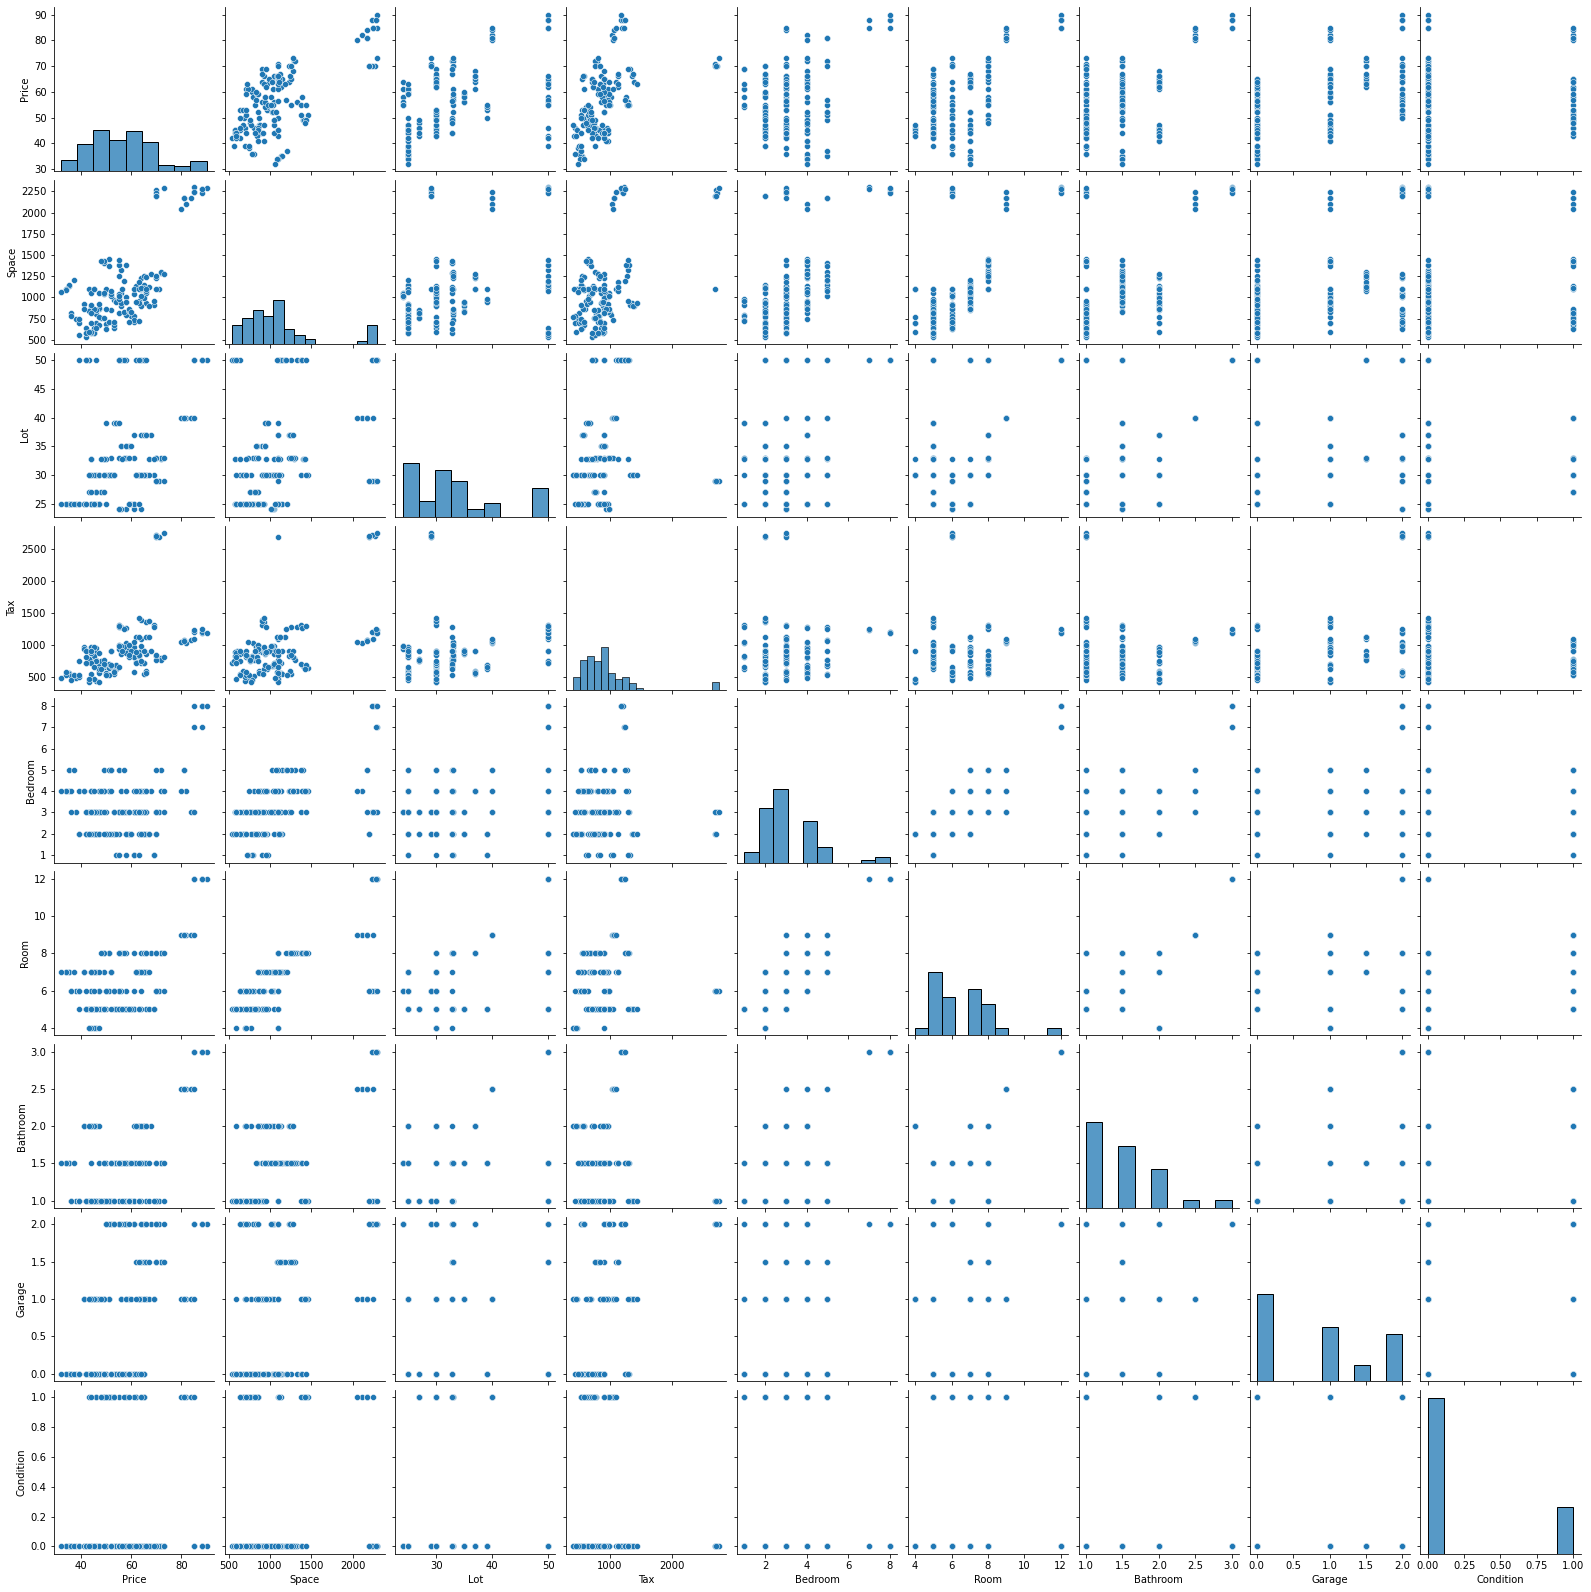

In [98]:
sns.pairplot(df3)

(array([14., 48., 35., 43.,  6., 11.]),
 array([32.        , 41.66666667, 51.33333333, 61.        , 70.66666667,
        80.33333333, 90.        ]),
 <BarContainer object of 6 artists>)

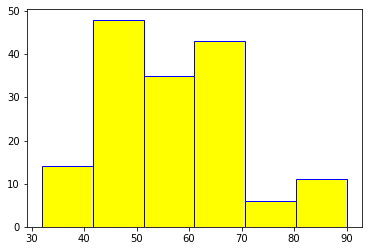

In [105]:
plt.hist(df3.Price,facecolor="yellow",edgecolor="blue",bins=6)

Text(0.5, 1.0, 'Boxplot for Price ')

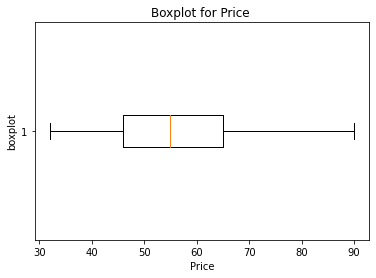

In [135]:
plt.boxplot(df3['Price'],vert=False)
plt.xlabel("Price"),plt.ylabel("boxplot")
plt.title("Boxplot for Price ")

Text(0.5, 1.0, 'Boxplot for Space ')

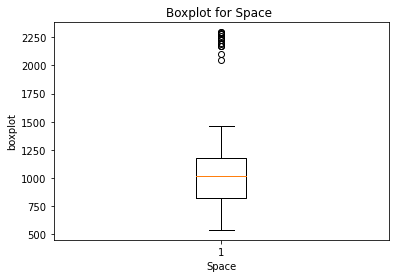

In [120]:
plt.boxplot(df3['Space'],vert=True)
plt.xlabel("Space"),plt.ylabel("boxplot")
plt.title("Boxplot for Space ")

Text(0.5, 1.0, 'Boxplot for Lot ')

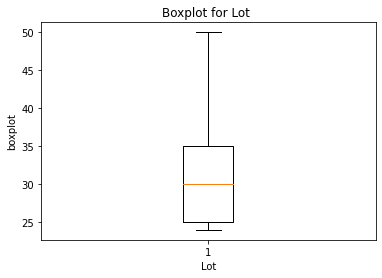

In [121]:
plt.boxplot(df3['Lot'],vert=True)
plt.xlabel("Lot"),plt.ylabel("boxplot")
plt.title("Boxplot for Lot ")

Text(0.5, 1.0, 'Boxplot for Tax ')

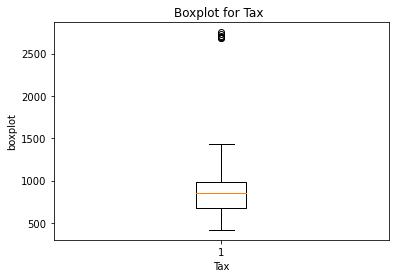

In [122]:
plt.boxplot(df3['Tax'],vert=True)
plt.xlabel("Tax"),plt.ylabel("boxplot")
plt.title("Boxplot for Tax ")

In [128]:
df3.head()

,Price,Space,Lot,Tax,Bedroom,Room,Bathroom,Garage,Condition
0,53.0,967.0,39.0,652.0,2.0,5.0,1.5,0.0,0.0
1,55.0,815.0,33.0,1000.0,2.0,5.0,1.0,2.0,1.0
2,56.0,900.0,35.0,897.0,3.0,5.0,1.5,1.0,0.0
3,58.0,1007.0,24.0,964.0,3.0,6.0,1.5,2.0,0.0
4,64.0,1100.0,50.0,1099.0,3.0,7.0,1.5,1.5,0.0


<AxesSubplot:xlabel='Price', ylabel='Tax'>

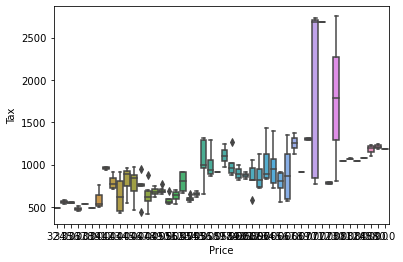

In [129]:
sns.boxplot(x='Price',y='Tax',data=df3)

<AxesSubplot:xlabel='Price', ylabel='Space'>

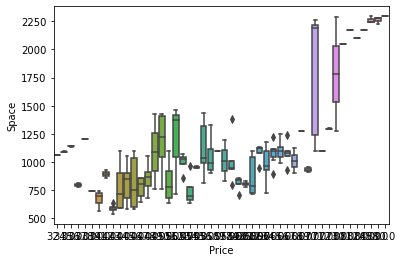

In [131]:
sns.boxplot(x='Price',y='Space',data=df3)

<AxesSubplot:xlabel='Price', ylabel='Lot'>

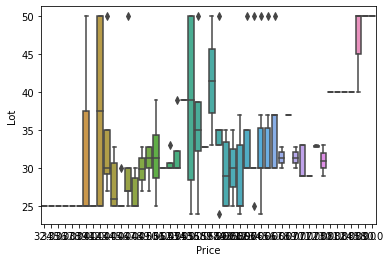

In [132]:
sns.boxplot(x='Price',y='Lot',data=df3)

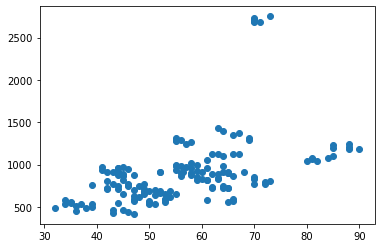

In [130]:
plt.scatter(df3.Price,df3.Tax)

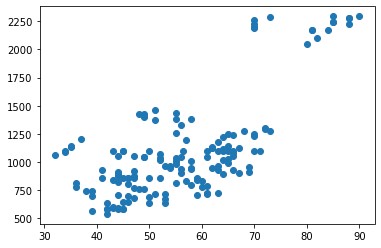

In [133]:
plt.scatter(df3.Price,df3.Space)

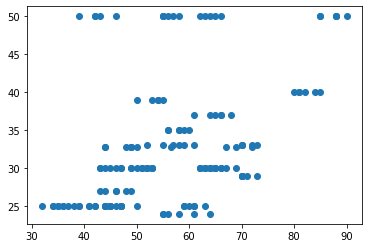

In [134]:
plt.scatter(df3.Price,df3.Lot)

In [189]:
import statsmodels.formula.api as smf

In [190]:
df4=smf.ols('Price~Space+Lot+Tax',data=df3).fit()
df4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     62.96
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.44e-26
Time:                        12:10:10   Log-Likelihood:                -559.84
No. Observations:                 157   AIC:                             1128.
Df Residuals:                     153   BIC:                             1140.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.6567      3.059      8.061      0.000      18.614      30.699
Space          0.0156      0.002      7.846      0.000       0.012       0.020
Lot            0.3090      0.093      3.337      0.001       0.126       0.492
Tax            0.0050      0.002      2.599      0.010       0.001       0.009
==============================================================================
Omnibus:                       20.138   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.162
Skew:                          -0.238   Prob(JB):                       0.0279
Kurtosis:                       2.068   Cond. No.                     6.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
df4_S=smf.ols('Price~Space',data=df3).fit()
df4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     62.96
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.44e-26
Time:                        12:10:11   Log-Likelihood:                -559.84
No. Observations:                 157   AIC:                             1128.
Df Residuals:                     153   BIC:                             1140.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.6567      3.059      8.061      0.000      18.614      30.699
Space          0.0156      0.002      7.846      0.000       0.012       0.020
Lot            0.3090      0.093      3.337      0.001       0.126       0.492
Tax            0.0050      0.002      2.599      0.010       0.001       0.009
==============================================================================
Omnibus:                       20.138   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.162
Skew:                          -0.238   Prob(JB):                       0.0279
Kurtosis:                       2.068   Cond. No.                     6.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
df4_L=smf.ols('Price~Lot',data=df3).fit()
df4_L.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     36.25
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.21e-08
Time:                        12:10:11   Log-Likelihood:                -606.45
No. Observations:                 157   AIC:                             1217.
Df Residuals:                     155   BIC:                             1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9926      3.847      8.837      0.000      26.394      41.591
Lot            0.6852      0.114      6.021      0.000       0.460       0.910
==============================================================================
Omnibus:                        5.086   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                2.820
Skew:                           0.051   Prob(JB):                        0.244
Kurtosis:                       2.352   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
df4_T=smf.ols('Price~Tax',data=df3).fit()
df4_T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     50.03
Date:                Tue, 23 May 2023   Prob (F-statistic):           4.88e-11
Time:                        12:10:12   Log-Likelihood:                -600.99
No. Observations:                 157   AIC:                             1206.
Df Residuals:                     155   BIC:                             1212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9954      2.105     20.429      0.000      38.838      47.153
Tax            0.0148      0.002      7.073      0.000       0.011       0.019
==============================================================================
Omnibus:                       10.528   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.405
Skew:                           0.658   Prob(JB):                      0.00334
Kurtosis:                       2.900   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
df4_ST=smf.ols('Price~Space+Tax',data=df3).fit()
df4_ST.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     83.38
Date:                Tue, 23 May 2023   Prob (F-statistic):           2.91e-25
Time:                        12:10:13   Log-Likelihood:                -565.35
No. Observations:                 157   AIC:                             1137.
Df Residuals:                     154   BIC:                             1146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.5046      2.019     16.102      0.000      28.517      36.493
Space          0.0180      0.002      9.407      0.000       0.014       0.022
Tax            0.0046      0.002      2.332      0.021       0.001       0.009
==============================================================================
Omnibus:                       11.103   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.294
Skew:                          -0.450   Prob(JB):                       0.0158
Kurtosis:                       2.322   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
#Calculating VIF

In [196]:
rsq_space=smf.ols('Space~Tax+Lot',data=df3).fit().rsquared
vif_space=1/(1-rsq_space)
vif_space

1.6298860008022293

In [197]:
rsq_Tax=smf.ols('Tax~Space+Lot',data=df3).fit().rsquared
vif_Tax=1/(1-rsq_Tax)
vif_Tax

1.421423021845729

In [198]:
rsq_Lot=smf.ols('Lot~Space+Tax',data=df3).fit().rsquared
vif_Lot=1/(1-rsq_Lot)
vif_Lot

1.183273911285286

In [199]:
#Storing vif values in a data frame

In [200]:
d5={'Variables':['Space','Lot','Tax'],'VIf':[vif_space,vif_Lot,vif_Tax]}
d5

{'Variables': ['Space', 'Lot', 'Tax'],
 'VIf': [1.6298860008022293, 1.183273911285286, 1.421423021845729]}

In [201]:
Vif_frame=pd.DataFrame(d5)
Vif_frame

,Variables,VIf
0,Space,1.629886
1,Lot,1.183274
2,Tax,1.421423


In [202]:
res=df4.resid
res

0     -2.054255
1      2.424427
2      1.997675
3      5.392104
4      1.231514
         ...   
152   -6.356865
153   -2.504172
154    4.976200
155    8.757410
156    0.000000
Length: 157, dtype: float64

In [203]:
res.mean()

1.9008149619060005e-15

<function matplotlib.pyplot.show(close=None, block=None)>

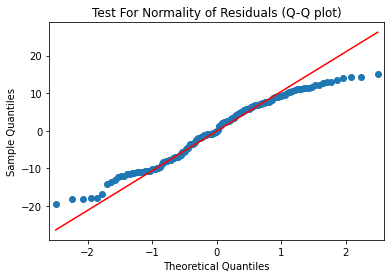

In [204]:
import statsmodels.api as sm
qqplot =sm.qqplot(res,line='q')
plt.title("Test For Normality of Residuals (Q-Q plot)")
plt.show

In [205]:
list(np.where(df4.resid>10))

[array([  8,  15,  18,  25,  34,  41,  51,  60,  67,  68,  70,  86,  96,
        103, 107, 112, 119, 120, 138, 145, 148], dtype=int64)]

In [209]:
#Residual plot for homoscedasticity

In [206]:
def get_standardized_values(vals):return(vals-vals.mean())/vals.std()

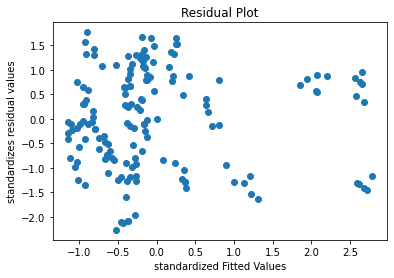

In [207]:
plt.scatter(get_standardized_values(df4.fittedvalues),get_standardized_values(df4.resid))
plt.title("Residual Plot")
plt.xlabel('standardized Fitted Values')
plt.ylabel('standardizes residual values')
plt.show()

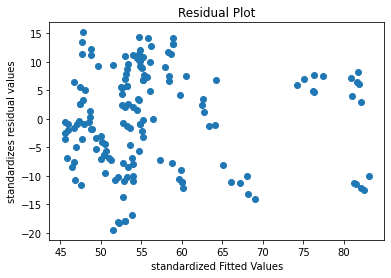

In [208]:
plt.scatter(df4.fittedvalues,df4.resid)
plt.title("Residual Plot")
plt.xlabel('standardized Fitted Values')
plt.ylabel('standardizes residual values')
plt.show()

eval_env: 1


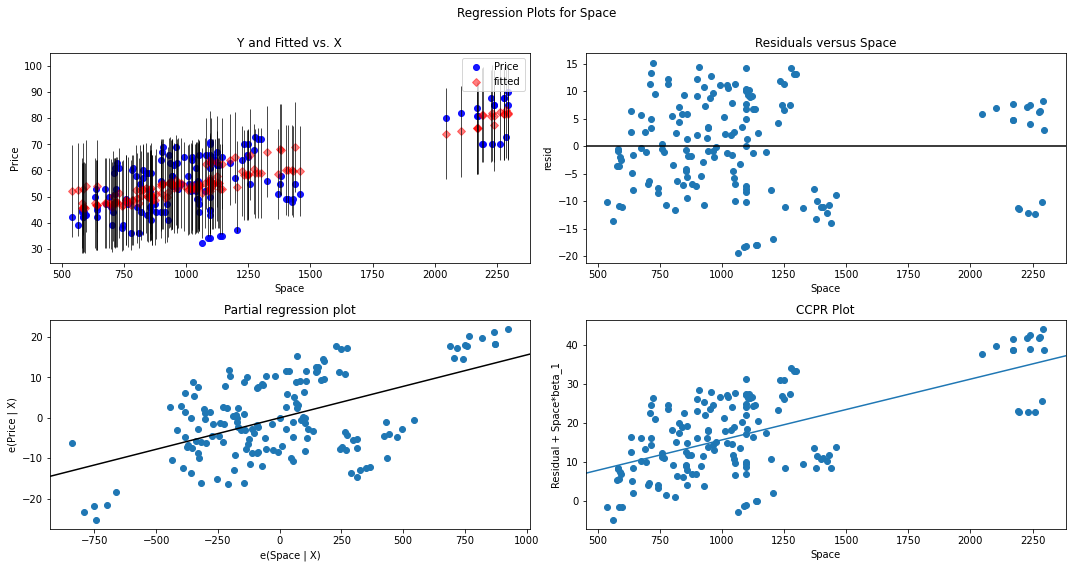

In [210]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(df4,"Space",fig=fig)
plt.show()

eval_env: 1


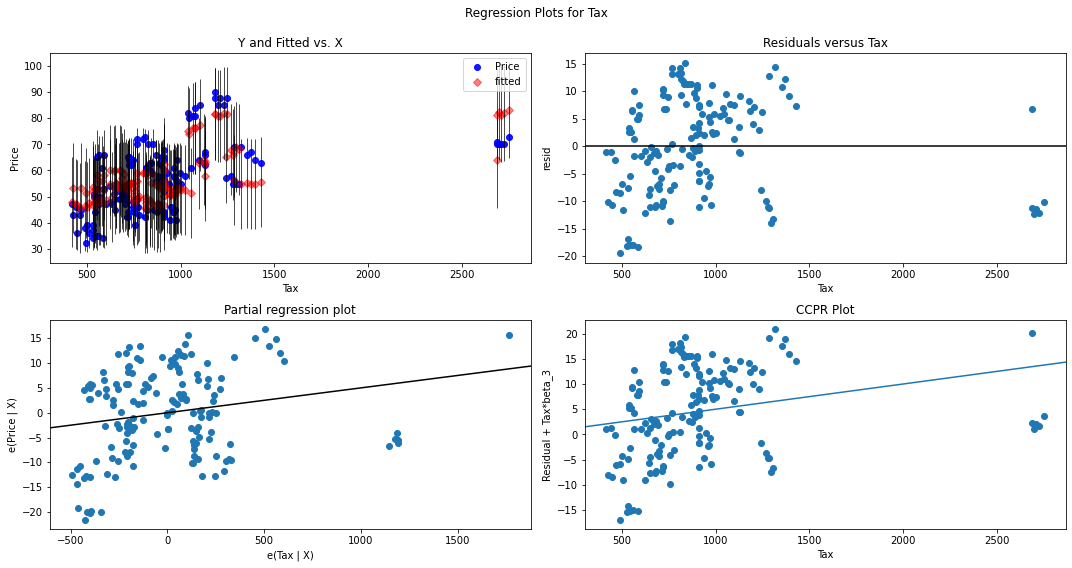

In [211]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(df4,"Tax",fig=fig)
plt.show()

eval_env: 1


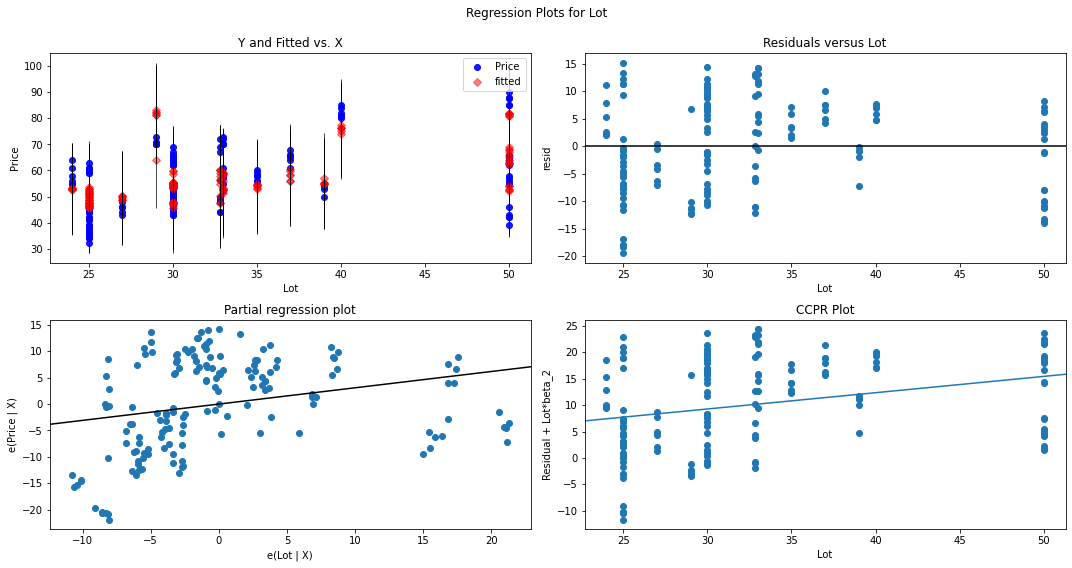

In [212]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(df4,"Lot",fig=fig)
plt.show()

In [213]:
#Model detection dignosis (Cooks Distance)

In [214]:
model_influence=df4.get_influence()
(C,_)=model_influence.cooks_distance

In [215]:
C

array([2.04254312e-04, 2.48211790e-04, 1.29545905e-04, 1.44390840e-03,
       2.34493406e-04, 2.32393670e-03, 7.40845640e-03, 8.97044086e-02,
       5.86299735e-03, 8.35256925e-03, 3.63791302e-03, 1.66142465e-04,
       1.66814148e-04, 6.68336773e-04, 1.82022010e-02, 5.76135244e-03,
       1.49440073e-03, 4.99917529e-04, 8.62235658e-03, 2.40634642e-02,
       4.08511038e-03, 3.16312781e-02, 4.21758195e-04, 4.97664540e-05,
       2.83628851e-04, 2.71910494e-03, 3.66796218e-05, 1.43170402e-03,
       3.19187840e-04, 3.10205159e-03, 2.57011319e-04, 9.21636810e-04,
       8.04379662e-03, 8.65769133e-02, 6.39062651e-03, 4.24707032e-03,
       1.02893317e-02, 5.77813424e-05, 1.79433901e-04, 1.43811690e-03,
       1.86421784e-02, 6.79667291e-03, 2.69200795e-03, 2.63256865e-03,
       7.11384491e-03, 2.50905784e-02, 7.58606930e-03, 2.69849235e-02,
       1.14709690e-05, 4.19128418e-03, 1.94212971e-03, 3.09767049e-03,
       2.31376884e-03, 7.34184391e-04, 1.33495169e-03, 3.56448714e-04,
      

In [218]:
import numpy as np

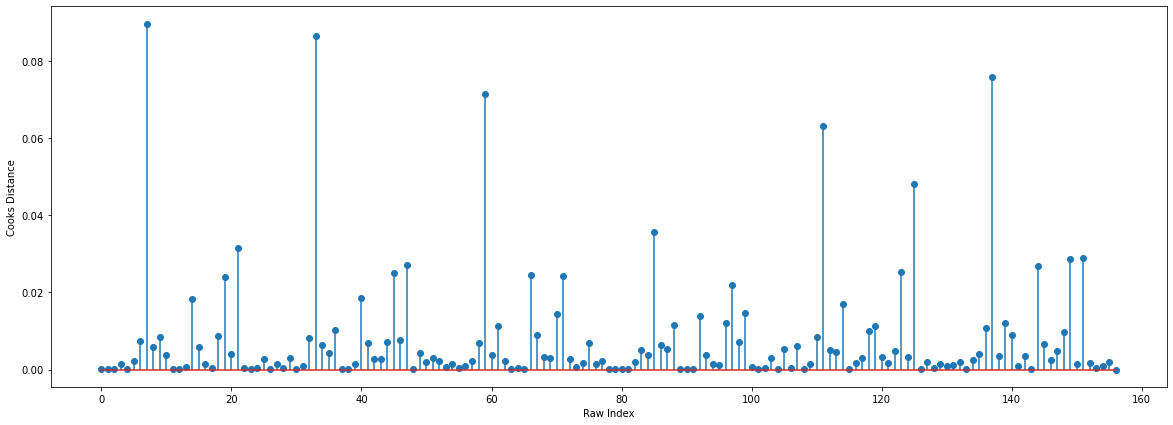

In [255]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),C)
plt.xlabel('Raw Index')
plt.ylabel('Cooks Distance')
plt.show()

In [256]:
np.argmax(C),np.max(C)

(7, 0.0897044085884536)

In [257]:
df[df.index.isin([7, 0.0897044085884536])]

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
7,70.0,3.0,2261.0,6.0,29.0,2700.0,1.0,2.0,0.0


In [258]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [259]:
df=pd.read_csv("realest.csv")

In [265]:
df_new=df.drop(df.index[[7, 0]],axis=0).reset_index()
df_new

,index,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
1,2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
2,3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
3,4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
4,5,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
150,152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
151,153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
152,154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
153,155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [266]:
df6=df_new.drop(['index'],axis=1)

In [267]:
df6

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
1,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
2,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
3,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
4,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
150,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
151,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
152,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
153,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [268]:
#Building our final model

In [272]:
final_ml_P=smf.ols('Price~Space+Lot+Tax',data=df6).fit()

In [273]:
(final_ml_P.rsquared,final_ml_P.aic)

(0.5845927521471799, 907.8481333241969)

In [281]:
final_ml_P=smf.ols('Price~Space+Tax',data=df6).fit()

In [282]:
(final_ml_P.rsquared,final_ml_P.aic)

(0.5348820071890573, 981.6574751858091)

In [283]:
#Cooks distance

In [285]:
model_influence_P=df4.get_influence()
(C,_)=model_influence_P.cooks_distance

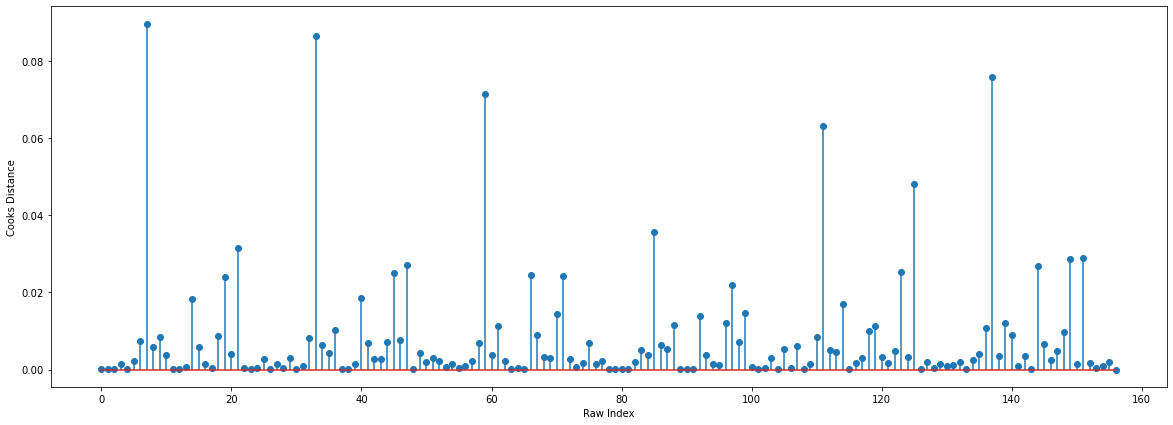

In [287]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df3)),C)
plt.xlabel('Raw Index')
plt.ylabel('Cooks Distance')
plt.show()

In [288]:
np.argmax(C),np.max(C)

(7, 0.0897044085884536)

In [299]:
df7=df6.drop(df6.index[[7,0]],axis=0)

In [300]:
df7

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
1,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
2,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
3,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
4,44.0,4.0,897.0,7.0,25.0,960.0,2.0,1.0,0.0
5,49.0,5.0,1400.0,8.0,NaN,678.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
150,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
151,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
152,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
153,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [301]:
final_ml_Price=smf.ols('Price~Space+Lot+Tax',data=df7).fit()

In [303]:
(final_ml_Price.rsquared,final_ml_Price.aic)

(0.5743389030120518, 894.9262333871063)

In [304]:
#predict for new data

In [307]:
pred_y=final_ml_Price.predict(df3)

In [308]:
pred_y

0      55.115057
1      52.380387
2      53.905248
3      52.755502
4      62.337318
         ...    
152    50.358520
153    45.646718
154    48.153714
155    53.284143
156    56.543434
Length: 157, dtype: float64